# Homework 3: Mining Data Streams

Date: 28/11/2021

Authors: Alessandro Sanvito and Thuany Karoline Stuart

# Solution

The code in the src/ folder reproduces the algorithm described in "L. De Stefani, A. Epasto, M. Riondato, and E. Upfal, [TRIÈST: Counting Local and Global Triangles in Fully-Dynamic Streams with Fixed Memory Size](http://www.kdd.org/kdd2016/papers/files/rfp0465-de-stefaniA.pdf), KDD'16". In particular, the team implemented TRIÈST-BASE and TRIÈST-IMPR. The algorithms were then tested on the [Social circles: Facebook](https://snap.stanford.edu/data/ego-Facebook.html) network to assess correctness and performance.

The code leverages Python's higher-order functions for fast iteration. Even though no framework supporting data streams is leveraged, the python code is structured so that the file containing the edges in the graph acts like a stream, and each graph edge is processed one at a time in order. In this way, the code supports unbounded streams and arbitrarily large files.

An element of particular interest in the implementation is the data structure chosen to represent the sampleset of edges.
The choice was between a set of tuples, a dictionary or a set of frozesets.
The team decided to discard the first option due to TRIÈST being specifically meant for undirected graphs. A dictionary would have proven useful to retrieve the set of nodes one hop away from a node in the sampleset in O(1) time. However, the dictionary is more suitable to represent directed connections, thus making the insertion or deletion of an undirected edge more complex.
Therefore, considering the above-mentioned reasons, the sampleset was implemented as a set of frozensets representing the edges.

Overall, the implementation achieves the expected results with acceptable performance.

# Questions

1.*What were the challenges you have faced when implementing the algorithm?*

The algorithm was well documented, even comprising pseudocode, so the most challenging part involved choosing the most suitable data structures. In particular, the choice of the data structure for the sampleset is documented in the solution section.

2.*Can the algorithm be easily parallelized? If yes, how? If not, why? Explain.*

Introducing data parallelism in the algorithm does not make sense since it is designed for a stream, and the operations on the counters are blocking. Moreover, the operations on the counters rely on the current state of the sampleset, which can be modified dynamically. However, some level of task parallelism can be introduced. In particular, computing the sets of nodes one hop away from the considered node might be parallelized.

3.*Does the algorithm work for unbounded graph streams? Explain.*

The algorithm works on unbounded data streams and can be queried at any time for the current estimation of the number of triangles. As visible in the experiments, the algorithm needs only the current triangles counter, the size of the sampleset and the number of observed samples in the stream to work.

4.*Does the algorithm support edge deletions? If not, what modification would it need? Explain.*

Although TRIÈST-BASE and TRIÈST-IMPR do not support edge deletions, the same paper where they are presented describes TRIÈST-FD, a fully dynamic version. TRIÈST-FD builds upon the concept of Random Pairing (RP) by keeping track of the number of edges deleted from the sampleset due to deletion in the stream and the overall number of deletions. This information then drives the insertion of a new edge in the sampleset and the formula for the estimation of the number of triangles.

# How to Run

To run the conducted experiments, follow the steps:

1. Unzip the file containing the homework.
1. Ensure to have Python 3 installed on your machine.
1. Ensure that NumPy, Typing, Scipy, Functools and Jupyter Notebook are installed in your environment.
1. Start Jupyter Notebook.
1. In Jupyter Notebook, open the notebook "Mining Data Streams" in the folder /src of the homework.
1. Press "run all".

# Experiments

To test the TRIEST algorithm for graph triangle estimation, we run experiments on the [Social circles: Facebook](https://snap.stanford.edu/data/ego-Facebook.html) dataset. The dataset contains 4039 nodes, 88234 edges, and 1612010 triangles. We will compare the number of triangles found by the Triest Base and Improved algorithm with different reservoir sizes with the real number of triangles in the graph.

## Set up

Firstly, we set up the experiments by importing the required libraries and defining the path to the dataset file.

### Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from triest import *

sns.set_style('whitegrid')

C:\virtual_environments\ml_base_venv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\virtual_environments\ml_base_venv\lib\site-packages\numpy\.libs\libopenblas.2V74HQ3MKNZHDCKJELIPPY7V6QMK3UOZ.gfortran-win32.dll
C:\virtual_environments\ml_base_venv\lib\site-packages\numpy\.libs\libopenblas.U35RT5X5BPDSH5ZTF276YADQR2KDU6PR.gfortran-win32.dll
  stacklevel=1)


### Define Path

In [3]:
path = os.path.dirname(os.getcwd())
data_path = os.path.join(path, 'data', 'facebook_combined.txt')
data_path

'C:\\Users\\thuan\\Documents\\Projects\\KTH\\ID2222-Data-Mining-Sanvito-Stuart\\lab3\\data\\facebook_combined.txt'

## Triest Base

We estimate the number of triangles in the graph with the Triest Base algorithm ten times for each M=1000, 5000, 10000, 20000, and 30000.

In [4]:
M = [1000, 5000, 10000, 20000, 30000]
iterations = 10
all_estimations = []

for m in M:
  estimations = []
  for i in range(iterations):
    print(f"Running iteration {i} for M={m}...")
    estimation = TriestBase(file=data_path, M=m, verbose=False).run()
    estimations.append(estimation)
  all_estimations.append(estimations)

Running iteration 0 for M=1000...
Running iteration 1 for M=1000...
Running iteration 2 for M=1000...
Running iteration 3 for M=1000...
Running iteration 4 for M=1000...
Running iteration 5 for M=1000...
Running iteration 6 for M=1000...
Running iteration 7 for M=1000...
Running iteration 8 for M=1000...
Running iteration 9 for M=1000...
Running iteration 0 for M=5000...
Running iteration 1 for M=5000...
Running iteration 2 for M=5000...
Running iteration 3 for M=5000...
Running iteration 4 for M=5000...
Running iteration 5 for M=5000...
Running iteration 6 for M=5000...
Running iteration 7 for M=5000...
Running iteration 8 for M=5000...
Running iteration 9 for M=5000...
Running iteration 0 for M=10000...
Running iteration 1 for M=10000...
Running iteration 2 for M=10000...
Running iteration 3 for M=10000...
Running iteration 4 for M=10000...
Running iteration 5 for M=10000...
Running iteration 6 for M=10000...
Running iteration 7 for M=10000...
Running iteration 8 for M=10000...
Runni

We observe that the increase in the reservoir size produces estimates that are more precise and less variant.

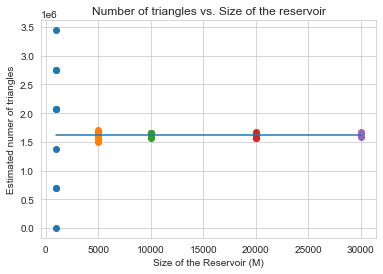

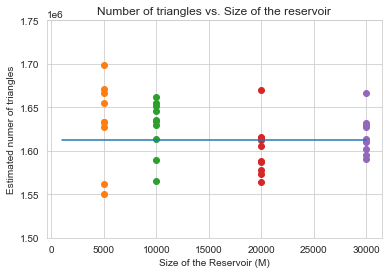

In [23]:
for i in range(5):
  plt.scatter([M[i]]*10, all_estimations[i])
plt.plot([1000, 30000], [1612010, 1612010])
plt.xlabel('Size of the Reservoir (M)')
plt.ylabel('Estimated numer of triangles')
plt.title('Number of triangles vs. Size of the reservoir')
plt.show()


for i in range(5):
  plt.scatter([M[i]]*10, all_estimations[i])
plt.plot([1000, 30000], [1612010, 1612010])
plt.xlabel('Size of the Reservoir (M)')
plt.ylabel('Estimated numer of triangles')
plt.title('Number of triangles vs. Size of the reservoir')
plt.ylim(15e5, 175e4)
plt.show()

## Triest Improved

We estimate the number of triangles in the graph with the Triest Improved algorithm ten times for each M=1000, 5000, 10000, 20000, and 30000.

In [4]:
M = [1000, 5000, 10000, 20000, 30000]
iterations = 10
all_estimations = []

for m in M:
  estimations = []
  for i in range(iterations):
    print(f"Running iteration {i} for M={m}...")
    estimation = TriestImproved(file=data_path, M=m, verbose=False).run()
    estimations.append(estimation)
  all_estimations.append(estimations)

Running iteration 0 for M=1000...
Running iteration 1 for M=1000...
Running iteration 2 for M=1000...
Running iteration 3 for M=1000...
Running iteration 4 for M=1000...
Running iteration 5 for M=1000...
Running iteration 6 for M=1000...
Running iteration 7 for M=1000...
Running iteration 8 for M=1000...
Running iteration 9 for M=1000...
Running iteration 0 for M=5000...
Running iteration 1 for M=5000...
Running iteration 2 for M=5000...
Running iteration 3 for M=5000...
Running iteration 4 for M=5000...
Running iteration 5 for M=5000...
Running iteration 6 for M=5000...
Running iteration 7 for M=5000...
Running iteration 8 for M=5000...
Running iteration 9 for M=5000...
Running iteration 0 for M=10000...
Running iteration 1 for M=10000...
Running iteration 2 for M=10000...
Running iteration 3 for M=10000...
Running iteration 4 for M=10000...
Running iteration 5 for M=10000...
Running iteration 6 for M=10000...
Running iteration 7 for M=10000...
Running iteration 8 for M=10000...
Runni

We observe that the increase in the reservoir size produces estimates that are more precise and less variant. In comparison to the Triest Base, we can visually inspect that the estimations vary less.

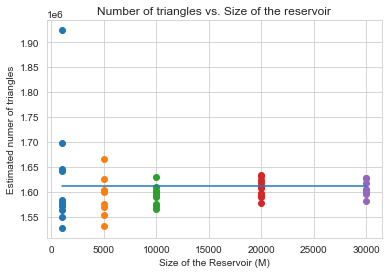

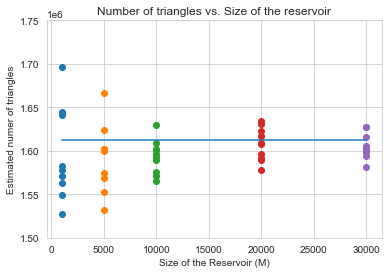

In [5]:
for i in range(5):
  plt.scatter([M[i]]*10, all_estimations[i])
plt.plot([1000, 30000], [1612010, 1612010])
plt.xlabel('Size of the Reservoir (M)')
plt.ylabel('Estimated numer of triangles')
plt.title('Number of triangles vs. Size of the reservoir')
plt.show()


for i in range(5):
  plt.scatter([M[i]]*10, all_estimations[i])
plt.plot([1000, 30000], [1612010, 1612010])
plt.xlabel('Size of the Reservoir (M)')
plt.ylabel('Estimated numer of triangles')
plt.title('Number of triangles vs. Size of the reservoir')
plt.ylim(15e5, 175e4)
plt.show()